# COGS 108 - Final Project 

# Overview

As a group of college students, our group wanted to answer a question that was relatable to us. We wanted to see if there was any correlation between a students drinking habits and their academic performance in school. We analyzed the daily and weekend drinking habits of students in Portugal, creating visuals and running linear regression tests on certain variables. Our visuals showed a direct correlation between drinking habits and academic performance, but our linear regression tests seemed to negate the results of these visuals. 


# Names

- Cole Takayama
- Dhivakar Krishnamoorthi Geetha
- Irene Tang
- Valentina Carreno


# Research Question

**Is there a correlation between the amount of alcohol a student consumes and their academic performance in school?** The legal drinking age varies from one country to another, but most tend to have the legal drinking age be between 18 and 21. The dataset we have chosen uses results collected from students in Portugal and had observations we thought would be useful to answer our question. Although we would have liked to have a more diverse dataset across students from different countries, our team had trouble finding other data. The analysis to this question reflects upon Portugeuse students and may not correlate well when applied to students in all countries.


## Background and Prior Work

Adolescence and young adulthood are periods of continued biological and psychosocial maturation. Thus, there may be deleterious effects of consuming large quantities of alcohol on neural development and associated cognition during this time. The highest proportion of people with alcohol disorders are aged between 18 and 29 years, an age bracket that includes the majority of enrolled university students. Heavy alcohol use has been well documented among students, and many students adopt heavy-drinking habits for the first time during their time at university (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/#ref1). Although, alcohol-related problems do not start at the level of drinking legally defined as intoxication. Reductions in cognitive and psychomotor performance are found at even low levels of alcohol consumption (Breitmeier et al., 2007; Tagawa et al., 2000), which may lead to negative health consequences. The relationship between alcohol consumption and academic performance is a concern for university administrators, officials, and parents. Alcohol consumption has been negatively associated with bad academic performance, and heavy drinking has been proposed as an predicted contributor to students' weariness from college. Problems experienced by university students due to drinking have caused them to either miss class, fall behind in their schoolwork, and/or perform poorly on tests or other academic projects. 


There have been multiple studies of young binge and heavy drinkers by examining their brain structure(s). Results suggest that there are altered neural structure and activity in binge/heavy drinking youth that may be related to the neurotoxic effects of large quantity consumption of alcohol during these high plasticity neurodevelopment periods. For many students at university campuses, substance abuse, particularly excessive alcohol consumption, “binge drinking,” has become as much a part of the college experience as studying.


Our team is very interested about this topic as we are in the prime of our undergraduate career, we want to dig deeper to understand and analyze the effects of alcohol consumption in students. School is not only a time for intellectual development, but one of personal, social, spiritual, and emotional growth. While researching datasets regarding student alcohol consumption, we unfortunately could not find relevant datasets within the United States. This led us to widen the scope of our topic by searching for our topic in different regions of the world. We chose specifically Portugese students' dataset because it was the best fit in terms of our target age group and question that we were seeking. We also thought it was clever how they strategically measured activity of different regions in the brain. They measured performances in a Math course and Portugese language course. There are theories that the brain's two hemispheres function differently. For example, the left hemisphere being dominant in logic, which they tested in subjects like science and math and the right side of the brain prevails in being more visual and intuitive. It’s a fact that the two sides of our brains are different, and there are certain areas of our brain that have specialties. If we had the time and resources, our ideal target group would be students at UCSD and their effects on Major and General Education courses. 


All members of our group are third year students at UCSD, 21+ of age, and we felt we could reflect about our time in college thus far, while balancing our academic work and ‘fun’ activities. There is a lot of research conducted about students drinking in correlation with educational achievement. To be more specific, getting intoxicated can have a negative impact on cognitive functions (concentration, memory, attention) for about 48 hours. For one example, this means that if you get intoxicated on the last Friday of classes, your ability to study for finals on both Saturday and Sunday will be impaired; this in turn could have a negative impact on your ability to perform during your Monday exams.



References (include links):
- 1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/
- 2) https://www.frontiersin.org/articles/10.3389/fpsyg.2017.01111/full
- 3) https://www.healthline.com/health/left-brain-vs-right-brain




# Hypothesis


We predict that there will be a direct correlation between the amount of alcohol a student consumes and their performance in school. Alcohol is known to be depressant, meaning it slows down the functionality of a person's central nervous system. The legal drinking age is typically 18 years old in most international countries, while in the United States it is more strict at an age of 21 years old. Inexperienced drinkers often don’t know their limit or the consequences associated with drinking. As a result, this may lead them to be susceptible to do poorly in school and more difficult for someone to study and retain information if they drink too much alcohol.


# Dataset(s)

- Dataset Name: Student Alcohol Consumption
- Link to the dataset: https://www.kaggle.com/uciml/student-alcohol-consumption
- Number of observations: 1044 (combined between two datasets to make one main dataset)

In this dataset, we have several observations about students in Portugal ranging from drinking habits, grades in school, family information, and other variables. The students were either enrolled in a math class or a Portugeuse class, but for the purpose of our analysis we have merged the two datasets together. 


# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning


While the data was provided to us in an organized and neat csv file, the original dataset from kaggle consisted of two datasets, one for the students in the math class and another for students in the Portugeuse class. We wanted to run our analyses on both individual class datasets, but we also combined both to get an overall understanding that didn’t take the class into account. In addition to this, we also removed variables that we thought didn’t contribute any meaningful value to our question and analysis. The removed fields include: the occupation of a student’s mother and father, size of family, student’s primary guardian, the school they attended, home address, reason for attending a certain school, whether they attended nursery school, relationship status, and quality of family relationships. In total, 11 variables were removed in our data cleaning process. We also added an additional column that holds each student's average grade between all three exams taken to give us a cumulative perspective of a student’s academic performance in the column titled ‘AvgG’.


In [2]:
#IMPORT AND MERGE DATASETS
df_math = math_df = pd.read_csv('student-mat.csv')
df_port = port_df = pd.read_csv('student-por.csv')

list_df = [math_df, port_df]
merge_df = pd.concat(list_df)

In [3]:
#DROP VARIABLES FROM EACH DATASET
merge_df = merge_df.drop(['school', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'nursery', 'romantic', 'famrel'], axis=1)
math_df = math_df.drop(['school', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'nursery', 'romantic', 'famrel'], axis=1)
port_df = port_df.drop(['school', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'nursery', 'romantic', 'famrel'], axis=1)

In [4]:
#ADD COLUMN 'AvgG' WHICH IS AVG OF GRADES FROM ALL THREE PERIODS
def avg_grade(G1, G2, G3):
    return round((G1 + G2 + G3)/3)

In [5]:
#CALCULATE AVG GRADE FOR EACH STUDENT IN MERGE_DF
merge_df['AvgG'] = merge_df.apply(lambda X: avg_grade(X.G1, X.G2, X.G3), axis = 1)

In [6]:
#CALCULATE AVG GRADE FOR EACH STUDENT IN MATH CLASS
math_df['AvgG'] = math_df.apply(lambda X: avg_grade(X.G1, X.G2, X.G3), axis = 1)

In [7]:
#CALCULATE AVG GRADE FOR EACH STUDENT IN PORTUGEUSE CLASS
port_df['AvgG'] = port_df.apply(lambda X: avg_grade(X.G1, X.G2, X.G3), axis = 1)

In [8]:
merge_df.head(10)

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AvgG
0,F,18,A,4,4,2,2,0,yes,no,...,3,4,1,1,3,6,5,6,6,6
1,F,17,T,1,1,1,2,0,no,no,...,3,3,1,1,3,4,5,5,6,5
2,F,15,T,1,1,1,2,3,yes,yes,...,3,2,2,3,3,10,7,8,10,8
3,F,15,T,4,2,1,3,0,no,yes,...,2,2,1,1,5,2,15,14,15,15
4,F,16,T,3,3,1,2,0,no,yes,...,3,2,1,2,5,4,6,10,10,9
5,M,16,T,4,3,1,2,0,no,yes,...,4,2,1,2,5,10,15,15,15,15
6,M,16,T,2,2,1,2,0,no,no,...,4,4,1,1,3,0,12,12,11,12
7,F,17,A,4,4,2,2,0,yes,no,...,1,4,1,1,1,6,6,5,6,6
8,M,15,A,3,2,1,2,0,no,yes,...,2,2,1,1,1,0,16,18,19,18
9,M,15,T,3,4,1,2,0,no,yes,...,5,1,1,1,5,0,14,15,15,15


In [9]:
math_df.head(10)

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AvgG
0,F,18,A,4,4,2,2,0,yes,no,...,3,4,1,1,3,6,5,6,6,6
1,F,17,T,1,1,1,2,0,no,no,...,3,3,1,1,3,4,5,5,6,5
2,F,15,T,1,1,1,2,3,yes,yes,...,3,2,2,3,3,10,7,8,10,8
3,F,15,T,4,2,1,3,0,no,yes,...,2,2,1,1,5,2,15,14,15,15
4,F,16,T,3,3,1,2,0,no,yes,...,3,2,1,2,5,4,6,10,10,9
5,M,16,T,4,3,1,2,0,no,yes,...,4,2,1,2,5,10,15,15,15,15
6,M,16,T,2,2,1,2,0,no,no,...,4,4,1,1,3,0,12,12,11,12
7,F,17,A,4,4,2,2,0,yes,no,...,1,4,1,1,1,6,6,5,6,6
8,M,15,A,3,2,1,2,0,no,yes,...,2,2,1,1,1,0,16,18,19,18
9,M,15,T,3,4,1,2,0,no,yes,...,5,1,1,1,5,0,14,15,15,15


In [10]:
port_df.head(10)

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AvgG
0,F,18,A,4,4,2,2,0,yes,no,...,3,4,1,1,3,4,0,11,11,7
1,F,17,T,1,1,1,2,0,no,no,...,3,3,1,1,3,2,9,11,11,10
2,F,15,T,1,1,1,2,0,yes,no,...,3,2,2,3,3,6,12,13,12,12
3,F,15,T,4,2,1,3,0,no,no,...,2,2,1,1,5,0,14,14,14,14
4,F,16,T,3,3,1,2,0,no,no,...,3,2,1,2,5,0,11,13,13,12
5,M,16,T,4,3,1,2,0,no,no,...,4,2,1,2,5,6,12,12,13,12
6,M,16,T,2,2,1,2,0,no,no,...,4,4,1,1,3,0,13,12,13,13
7,F,17,A,4,4,2,2,0,yes,no,...,1,4,1,1,1,2,10,13,13,12
8,M,15,A,3,2,1,2,0,no,no,...,2,2,1,1,1,0,15,16,17,16
9,M,15,T,3,4,1,2,0,no,no,...,5,1,1,1,5,0,12,12,13,12


In [11]:
#CHECK FOR ANY MISSING DATA
merge_df.isna().sum().sum()

0

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [12]:
merge_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,AvgG
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,11.263410
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,3.234308
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,9.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.000000


**Structure** - The format of our data file is in CSV. Each observation is summarized in a separate row for each group observation. We have key information from their logistics, family status, education, studies, and health. The data is spread across multiple tables. 


**Granularity** - The type of granularity present is individual-level. Each row represents the information across Portugese students. All records represent the same level of granularity as they are individual students. The data was not originally summarized, however we used python libraries to describe our data to get the mean, median, and other summary statistics about each variable in the dataset. 


**Scope** - With the dataset we have chosen, we have no missing data fields for the provided observations. Our dataset has a mix of both quantitative and qualitative observations, which will help with our analysis on the dataset. The most important variables for our analysis are a students ‘workday alcohol consumption’, ‘weekend alcohol consumption’, and their grades for the given subject. 


**Temporality** - Although there is no temporality data within the dataset itself, the dataset was published in April, 2008, meaning that all observations must have originated before the said date.
Source date was reported in the format MM-YYYY, as no temporality data is observed in the dataset, null timestamps are not included. The timeframe these observations were taken will help in understanding the context of our data during analysis, if further datasets are added to our study, we can aggregate the data in from our current dataset into a pre-2008 category, with more recent observations being put into a post-2008 category.


**Faithfulness** - For the most part, all values are reasonable and to expectations. There weren't any unreasonable examples or typos in our dataset. The data was collected through school reports and questionnaires. Potential flaws include students may not feel comfortable providing information about their personal habits and academic performance, so they may have falsely reported some pieces of information. 


Text(0.5, 0.98, 'Grades Distribution Overall')

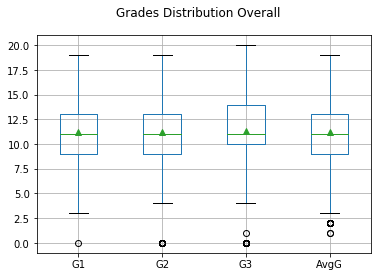

In [13]:
#boxplot of grades across each of the 3 periods + average when combined

boxplotGrades = merge_df.boxplot(column=['G1', 'G2', 'G3', 'AvgG'],  showmeans=True)
plt.suptitle("Grades Distribution Overall")

**Results**: When we analyze “Grades Distribution Overall”, we visualize all 3 grade periods on a scale from 0 to 20, taking a student’s 3 grades averaging them for the 4th column AvgG. What we found is that across all 3 quarters, the general average remains consistent, ranging between 10.0 to 12.5. Out of the 2 periods, grades within the 3rd period had the highest upper and lower quartile, having a similar median to the other 4 measurements. In terms of outliers, most outliers exist in the lower half, rather than the upper half for all 3 grade periods. In the 4th column are the observed average grades, an average of each student’s 3 period grades. Student’s average grades showed lower maximums but also lower minimums than any single period, with outliers being significantly higher than other periods as well.


**Interpretation**: Analyzing each of the 3 grade periods, and it becomes clear that on average, students scored higher than 50% on their assessments; with a max grade possible being 20 and the lowest being 0, the median every period was always above 10. One of the most striking features can be found in period 3 (g3), which had the highest maximum of any grade period, but also the lowest median. This suggests that outliers from g3 are pulling its median down, meaning that while G3 had some of the highest grades of any quarter, it also had the most outstanding low grades as well as seen through the outliers. 

Speaking of outliers, there are select students which scored 0 every quarter, but from the average grade measurement (AvgG) we know that these outlier scores are not from the same students every quarter. As the lowest outlier for AvgG is greater than 0, this implies that there is no single student who scored 0 every quarter, and in fact every student scored above 0 in at least 1 of their 3 periods.


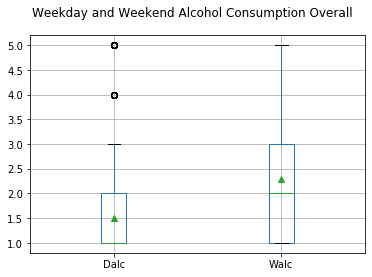

In [14]:
#box plot of merged weekday alcohol intake and weekend alcohol intake
plt.suptitle("Weekday and Weekend Alcohol Consumption Overall")
boxplotAlc = merge_df.boxplot(column=['Dalc', 'Walc'], showmeans=True)

**Results**: Consider “Weekday and Weekend Alcohol Consumption Overall”, which shows the alcohol consumption of students from both classes on weekdays (Dalc), as well as weekends (Walc) on a scale from 1 to 5, 1 being low alcohol consumption, 5 being high. The median for Dalc is low, averaging at 1.5, while the median for Walc is higher at approximately 2.3. Outliers exist for Dalc, existing above the maximum whereas Walc features no outliers.

**Interpretation**: From boxplotAlc, it is clear that on average, students’ weekday alcohol consumption is lower than that on weekends, with a few notable students who are frequent drinkers on weekdays, which is visualized through Dalc’s outliers. Likewise, there are students with as low alcohol consumption as possible, with both the Dalc and Walc having minimums of 1, which indicates low to 0 alcohol consumption.


<Figure size 432x288 with 0 Axes>

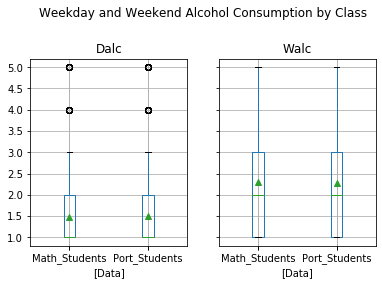

<Figure size 432x288 with 0 Axes>

In [15]:
#Alcohol intake by class

DalcMath = pd.DataFrame(math_df, columns = ['Dalc'])
WalcMath = pd.DataFrame(math_df, columns = ['Walc'])
DalcPort = pd.DataFrame(port_df, columns = ['Dalc'])
WalcPort = pd.DataFrame(port_df, columns = ['Walc'])

DalcMath['Data'] = 'Math_Students'
WalcMath['Data'] = 'Math_Students'
DalcPort['Data'] = 'Port_Students'
WalcPort['Data'] = 'Port_Students'
Alcs = [DalcMath, WalcMath, DalcPort, WalcPort]
allAlcs = pd.concat(Alcs)
allAlcs.boxplot(by="Data" , showmeans=True)
plt.suptitle("Weekday and Weekend Alcohol Consumption by Class")
plt.subplots_adjust(top=0.8)
plt.figure()


**Results**: Consider the 2 boxplots within “Weekday and Weekend Alcohol Consumption by Class”, which shows the distributions of Dalc and Walc per class. Both classes have relatively similar medians, maximums and minimums. Both the math class (Math_Students) and Portugeuse class (Port_Students) feature outliers within their Dalc but no outliers within the Walc.

**Interpretation**: What this demonstrates is that despite being from separate classes, student’s alcohol consumption across both classes remains relatively similar. This indicates to us that despite having come from separate classes, the class a student is in seems to have no effect on alcohol consumption.



<Figure size 432x288 with 0 Axes>

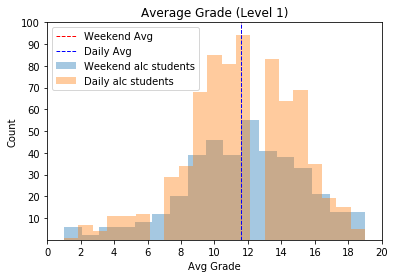

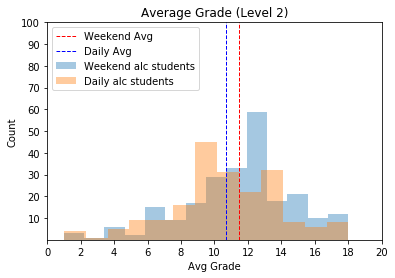

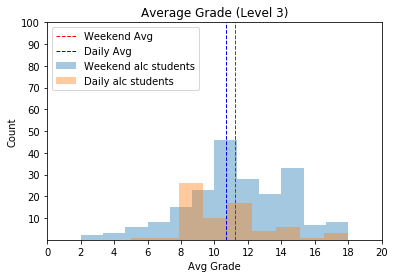

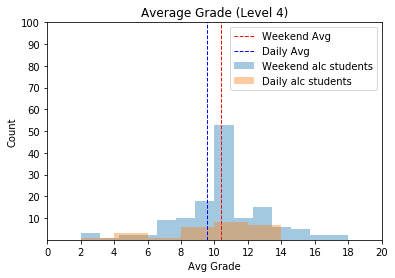

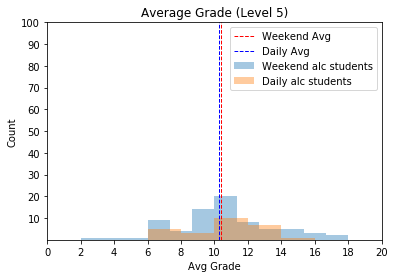

<Figure size 432x288 with 0 Axes>

In [16]:
color1 = 'red'
color2 = 'blue'

Temp = merge_df.loc[merge_df['Walc'] == 1]
Walc1 = Temp[['Walc', 'AvgG']]
sns.distplot(Walc1['AvgG'], kde=False, label='Weekend alc students')
Temp = merge_df.loc[merge_df['Dalc'] == 1]
Dalc1 = Temp[['Dalc', 'AvgG']]
sns.distplot(Dalc1['AvgG'], kde=False, label='Daily alc students')
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80 ,90, 100])
plt.axvline(Walc1['AvgG'].mean(), color=color1, linestyle='dashed', linewidth=1, label='Weekend Avg')
plt.axvline(Dalc1['AvgG'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Daily Avg')

plt.legend(prop={'size': 10})
plt.title('Average Grade (Level 1)')
plt.xlabel('Avg Grade')
plt.ylabel('Count')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.figure()



Temp = merge_df.loc[merge_df['Walc'] == 2]
Walc2 = Temp[['Walc', 'AvgG']]
sns.distplot(Walc2['AvgG'], kde=False,  label='Weekend alc students')
Temp = merge_df.loc[merge_df['Dalc'] == 2]
Dalc2 = Temp[['Dalc', 'AvgG']]
sns.distplot(Dalc2['AvgG'], kde=False,  label='Daily alc students')
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80 ,90, 100])
plt.axvline(Walc2['AvgG'].mean(), color=color1, linestyle='dashed', linewidth=1, label='Weekend Avg')
plt.axvline(Dalc2['AvgG'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Daily Avg')

plt.legend(prop={'size': 10})
plt.title('Average Grade (Level 2)')
plt.xlabel('Avg Grade')
plt.ylabel('Count')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.figure()


Temp = merge_df.loc[merge_df['Walc'] == 3]
Walc3 = Temp[['Walc', 'AvgG']]
sns.distplot(Walc3['AvgG'], kde=False, label='Weekend alc students')
Temp = merge_df.loc[merge_df['Dalc'] == 3]
Dalc3 = Temp[['Dalc', 'AvgG']]
sns.distplot(Dalc3['AvgG'], kde=False, label='Daily alc students')
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80 ,90, 100])
plt.axvline(Walc3['AvgG'].mean(), color=color1, linestyle='dashed', linewidth=1, label='Weekend Avg')
plt.axvline(Dalc3['AvgG'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Daily Avg')

plt.legend(prop={'size': 10})
plt.title('Average Grade (Level 3)')
plt.xlabel('Avg Grade')
plt.ylabel('Count')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])


plt.figure()


Temp = merge_df.loc[merge_df['Walc'] == 4]
Walc4 = Temp[['Walc', 'AvgG']]
sns.distplot(Walc4['AvgG'], kde=False, label='Weekend alc students')
Temp = merge_df.loc[merge_df['Dalc'] == 4]
Dalc4 = Temp[['Dalc', 'AvgG']]
sns.distplot(Dalc4['AvgG'], kde=False, label='Daily alc students')
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80 ,90, 100])
plt.axvline(Walc4['AvgG'].mean(), color=color1, linestyle='dashed', linewidth=1, label='Weekend Avg')
plt.axvline(Dalc4['AvgG'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Daily Avg')

plt.legend(prop={'size': 10})
plt.title('Average Grade (Level 4)')
plt.xlabel('Avg Grade')
plt.ylabel('Count')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.figure()

Temp = merge_df.loc[merge_df['Walc'] == 5]
Walc5 = Temp[['Walc', 'AvgG']]
sns.distplot(Walc5['AvgG'], kde=False, label='Weekend alc students')
Temp = merge_df.loc[merge_df['Dalc'] == 5]
Dalc5 = Temp[['Dalc', 'AvgG']]
sns.distplot(Dalc5['AvgG'], kde=False, label='Daily alc students')
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80 ,90, 100])
plt.axvline(Walc5['AvgG'].mean(), color=color1, linestyle='dashed', linewidth=1, label='Weekend Avg')
plt.axvline(Dalc5['AvgG'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Daily Avg')
          
plt.legend(prop={'size': 10})
plt.title('Average Grade (Level 5)')
plt.xlabel('Avg Grade')
plt.ylabel('Count')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.figure()


First, let's take a look at distribution for students who marked their weekend drinking habit as a ‘1’ which means very low or not at all according to the datasets scale. This plot has a fairly normal distribution and we see that a majority of the students from the datasets fall under the level 1 category. We see that the grade averages for the students who put a 1 for the weekend or weekday drinking habits are fairly similar with the weekend grade average being 11.605 and the weekday grade average being 11.570. Since this was the group that is considered to have the lowest alcohol consumption, it's fair to say that in comparison to the other groups, they had the highest average grades. There are a lot more students with grade averages that are higher than 12 in this group and we see a good portion of students doing very well with averages above 16 (80%).


Next, we take a look at the distribution for students who marked their weekend drinking habit as a ‘2’. The weekend group within this set seems to follow a normal distribution, while the weekday group has more of a bimodal distribution. Here we start to see a more significant difference between the average grades between those who indicated a ‘2’ for their weekend or weekday drinking habits. The average for the weekday drinkers in this group was almost a whole point lower than those who drank on the weekends, with the averages being 11.472 and 10.683 respectively. If we compare this to the students in the level 1 group, the grade average between the weekend drinking habits is very similar but the grade average for the weekday drinkers decreased significantly. 


As we approach the groups who indicated level ‘3’ and above drinking habits, we see the counts start to decrease. Because of this, the results may seem to be just as good as the students in level ‘2’, but there are far more students in the 2-8 point grade average range. The average for weekend consumption grade average continues to decrease, now being 11.25, but we do see a surprising result with the weekday drinking grade average. Although it is only a minor improvement, the average has gone up from level ‘2’ from 10.683 to 10.695. 


At level ‘4’ the trend continues, with the weekend grade average dropping to 10.413 and the daily grade average being at its lowest at 9.538. The counts stay relatively low, but we see a sharp peak in the weekend drinking average grade between 10 - 11 points. Most of the average grades tend to be on the lower end of the spectrum in this group, but we still see the trend that as the consumption increases the average grade decreases. 


Finally, at level ‘5’ which was considered ‘very high’ alcohol consumption, we see that the averages are almost identical between the weekend and weekday groups, with the averages being 10.369 and 10.269 respectively. Although the grade average for the daily drinkers isn’t the lowest amongst all groups, we can say that there is a direct trend between consumption and grade averages. 


In [17]:
#use dummy variables to use catergorical variable Dalc in linear regression, drop_first to avoid dummy variable trap
dum = pd.get_dummies(math_df['Dalc'], drop_first=True)
outcome_1, predictors_1 = patsy.dmatrices('AvgG ~ dum', math_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   AvgG   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.323
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.261
Time:                        17:21:29   Log-Likelihood:                -1076.2
No. Observations:                 395   AIC:                             2162.
Df Residuals:                     390   BIC:                             2182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9167      0.224     48.841      0.0

In [18]:
#Predict avg grade from walc in math class
dum = pd.get_dummies(math_df['Walc'], drop_first=True)
outcome_1, predictors_1 = patsy.dmatrices('AvgG ~ dum', math_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   AvgG   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.288
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.274
Time:                        17:21:29   Log-Likelihood:                -1076.2
No. Observations:                 395   AIC:                             2162.
Df Residuals:                     390   BIC:                             2182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9735      0.302     36.307      0.0

In [19]:
#Predict avg grade from dalc in port class
dum = pd.get_dummies(port_df['Dalc'], drop_first=True)
outcome_2, predictors_2 = patsy.dmatrices('AvgG ~ dum', port_df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   AvgG   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.288
Date:                Mon, 08 Jun 2020   Prob (F-statistic):              0.274
Time:                        17:21:29   Log-Likelihood:                -1076.2
No. Observations:                 395   AIC:                             2162.
Df Residuals:                     390   BIC:                             2182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9735      0.302     36.307      0.0

In [20]:
#Predict avg grade from walc in port class
dum = pd.get_dummies(port_df['Walc'], drop_first=True)
outcome_2, predictors_2 = patsy.dmatrices('AvgG ~ dum', port_df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   AvgG   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.185
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           0.000408
Time:                        17:21:29   Log-Likelihood:                -1587.7
No. Observations:                 649   AIC:                             3185.
Df Residuals:                     644   BIC:                             3208.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9919      0.178     67.196      0.0

In [21]:
#predict avg grade from age using port-df
outcome_2, predictors_2 = patsy.dmatrices('AvgG ~ age', port_df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   AvgG   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.50
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           0.000737
Time:                        17:21:29   Log-Likelihood:                -1592.3
No. Observations:                 649   AIC:                             3189.
Df Residuals:                     647   BIC:                             3197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7915      1.526     11.006      0.0

In the linear regression tests, we wanted to show if there was a correlation between a students average grade and the level they reported their alcohol consumption to be. We hoped that since our visualization showed a trend that agreed with our hypothesis, we could expect the same results with the linear regression tests. We ran multiple tests, dividing the datasets based on class first and then predicting average grade from daily drinking habits in one test and predicting average grade from weekend drinking habits in another test. 

For our null hypothesis, we predict that there is no correlation between average grade and a student’s weekend and daily drinking habits. We decided to use a significance value of p = 0.05. To perform these tests, we had to convert our categorical values of ‘Dalc’ and ‘Walc’ to dummy variables using pd.get_dummies function. We did this in an effort to avoid the dummy variable trap, which is a scenario in which two or more variables are highly correlated and we would be able to predict one variable from another. 

In the first two tests we examine the dataset of students in the math class, and run one test with the daily consumption and one test with the weekend consumption level. In the first test, we try to predict average grade from daily alcohol consumption. This test revealed some unexpectedly high p-values which suggests that data from these dummy variables is not statistically significant. When we ran these same tests with the Portugeuse dataset, we ran into the same high p-values. Since the p-values were larger than our significance value,  we came to the conclusion that we failed to reject the null hypothesis. 

However, we were still interested to see if any other variables proved to be significant in predicting average grade. What we found is that using age to predict average grade yielded a p-value of 0.001 which was less than our significance value. From this linear regression test, it has become apparent that there are other factors that could predict average grade such as age. 



# Ethics & Privacy

All the data we used is a dataset that’s located in an open, crowd-sourced forum where data scientists are allowed to use the dataset(s) for the public use, Kaggle. The dataset we found has a wide variety of variables of a sample population that focuses on students’ alcohol consumption and its effect on final grades. This allowed us to properly analyze our question. In terms of data privacy, in public datasets personal information should be kept private.  We took this into consideration for our dataset, ensuring we did not have any personal information to determine who the student is. Ethical challenges arise when opinions on what is considered right and wrong diverge. While there could have been potential situations where information on the student(s) slipped through, we cleaned the data a little more to strip any personal information. Another ethical consideration is the effect our project could have on publicizing regions of Portugal that had a higher student drinking rate. Although our graphs are not entirely accurate because they represent the cities where the students went to school in Portugal, our data should not be used for any measurement or regulations on this topic because its accuracy cannot be confirmed. Another concern was human error, which would likely happen when humans are entering in the results from a survey into the records. We cannot be confident that every response is inputted accurately. 



# Conclusion & Discussion

Initially, the question we sought to answer was whether there is a correlation between US college students' alcohol consumption and their academic performance. Our team had a difficult time finding an accurate dataset that reflected our original question. Thus, we decided to use a dataset found on Kaggle to analyze over 1,000 students in Portugal, from a survey that they took in regards to their academic achievements and their drinking habits. We considered the different attributes that contributed to each student’s performance, like mother's education, travel time to the school, any extracurricular activities, or if they had internet access at home and current health status, to name a few. Our hypothesis focused on looking at the correlation between the amount of alcohol a student consumes and their performance in school. The inspiration for choosing this topic came from our curiosity of the cognitive effects it has on people within our age group. 

The analysis of the data focused on revealing the weekend and weekday drinking habits of students and how it affected their academic performance. We analyzed the distributions for the students who marked their weekend and weekday drinking habit as “1” up to “5”, which is the highest alcohol consumption. Results from our data visualizations show that the average differences were significant and the higher they ranked in their alcohol consumption, the lower on average their grades are. This aligned with the predictions we had made in our hypothesis. However, when we started to run linear regression to test further validation of our results and to see if there is any correlation between alcohol consumption and academic performance, to which our initial results seem to be negated.

In conclusion, our results from our linear regression proved that there was no correlation between the consumption of alcohol and academic performance. We failed to reject the null hypothesis, despite what our visualizations predicted. We believe that there needs to be a quantitative measurement of the alcohol consumption in order to have a more accurate prediction and conclusion of the analysis to better pinpoint what variables have a direct effect on the academic performance. Throughout this project, we learned a tremendous amount of all aspects of data science. This project demonstrated the need of quality data in order to draw meaningful results.


# Team Contributions

- Cole: Bar Plots/Data Visualization/Histograms/Data Analysis & Results
- Dhiva: Write Up/Bar Plots/Data Visualization/Overview/Data Cleaning
- Irene: Write Up/Data Visualization Exploration/Ethics and Privacy/Data Analysis & Results
- Valentina: Write up/Data Visualization Exploration/Background/Contribution/Ethics and Privacy


We all contributed to ideation, research, planning, and writing. After finalizing our ideas, we split up the main tasks to further progress our project. We made sure to give each other weekly updates and ask for feedback when necessary. Cole worked on creating bar plots, data visualizations, and histograms. Dhiva worked on bar plots, data visualizations, and analysis. Irene worked on data visualization, exploration, and analysis. Valentina also worked on data visualization, exploration, and analysis. 
